## Import libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import warnings
warnings.filterwarnings('ignore')

## Read file

In [90]:
data = pd.read_csv('dataset_list.csv')
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [92]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [93]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

## Replace value

In [94]:
f = lambda x: x.mode().iat[0] if x.notna().any() else np.nan

data['CI_Cat'] = data['CI_Cat'].fillna(data.groupby('Urgency')['CI_Cat'].transform(f))
data['CI_Subcat'] = data['CI_Subcat'].fillna(data.groupby('CI_Cat')['CI_Subcat'].transform(f))

In [95]:
data['Impact'] = data['Impact'].replace('NS', data['Impact'].mode()[0])
data['Priority'] = data['Priority'].fillna(data.groupby(['Impact','Urgency'])['Priority'].transform(f))

In [96]:
data['No_of_Reassignments'] = data['No_of_Reassignments'].fillna(data.groupby('CI_Subcat')['No_of_Reassignments'].transform(f))
data['No_of_Related_Interactions'] = data['No_of_Related_Interactions'].fillna(data.groupby('CI_Subcat')['No_of_Related_Interactions'].transform(f))
data['No_of_Related_Incidents'] = data['No_of_Related_Incidents'].fillna(data.groupby('CI_Subcat')['No_of_Related_Incidents'].transform(f))
data['No_of_Related_Changes'] = data['No_of_Related_Changes'].fillna(data.groupby('CI_Subcat')['No_of_Related_Changes'].transform(f))
data['Closure_Code'] = data['Closure_Code'].fillna(data.groupby('CI_Subcat')['Closure_Code'].transform(f))
data['Related_Change'] = data['Related_Change'].fillna(data.groupby('CI_Subcat')['Related_Change'].transform(f))

In [97]:
data.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                      0
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents         712
No_of_Related_Changes          4334
Related_Change                 4334
dtype: int64

In [98]:
from collections import Counter

In [99]:
Counter(data.No_of_Related_Incidents).most_common(3)

[(1.0, 45719), (2.0, 74), (3.0, 20)]

In [100]:
data.No_of_Related_Incidents.replace(np.nan,1,inplace=True)

In [101]:
Counter(data.No_of_Related_Changes).most_common(3)

[(1.0, 42248), (2.0, 21), (3.0, 2)]

In [102]:
data.No_of_Related_Changes.replace(np.nan,1,inplace=True)

In [103]:
Counter(data.Related_Change).most_common(3)

[('C00003013', 33921), ('C00014762', 5051), ('C00004739', 1926)]

In [104]:
data.Related_Change.replace(np.nan,'C00003013',inplace=True)

In [105]:
data.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                      0
No_of_Related_Interactions        0
Related_Interaction               0
No_of_Related_Incidents           0
No_of_Related_Changes             0
Related_Change                    0
dtype: int64

<AxesSubplot:xlabel='No_of_Related_Incidents'>

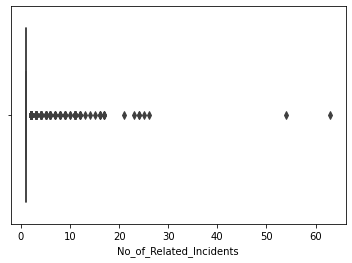

In [106]:
sb.boxplot(data["No_of_Related_Incidents"])

<AxesSubplot:xlabel='No_of_Related_Interactions'>

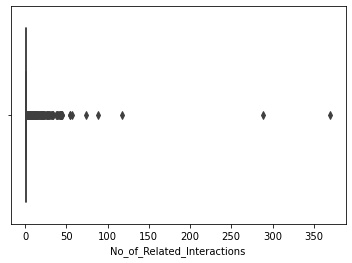

In [107]:
sb.boxplot(data["No_of_Related_Interactions"])

## Label Encoder

In [108]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.CI_Cat = enc.fit_transform(data.CI_Cat)
data.CI_Subcat = enc.fit_transform(data.CI_Subcat)
data.WBS = enc.fit_transform(data.WBS)
data.Category = enc.fit_transform(data.Category)
data.Closure_Code = enc.fit_transform(data.Closure_Code)
data.KB_number = enc.fit_transform(data.KB_number)
data.Related_Interaction = enc.fit_transform(data.Related_Interaction)
data.Related_Change = enc.fit_transform(data.Related_Change)

In [109]:
n = data.loc[:,['CI_Cat','CI_Subcat','WBS','Priority','No_of_Related_Interactions','No_of_Related_Incidents','Related_Interaction','KB_number','number_cnt','Closure_Code','No_of_Related_Changes','Related_Change']]
n.head(2)

,CI_Cat,CI_Subcat,WBS,Priority,No_of_Related_Interactions,No_of_Related_Incidents,Related_Interaction,KB_number,number_cnt,Closure_Code,No_of_Related_Changes,Related_Change
0,11,57,137,4.0,1.0,2.0,2,413,0.601292,6,1.0,54
1,1,57,70,3.0,1.0,1.0,3,456,0.415050,10,1.0,54


## Correlation matrix

<AxesSubplot:>

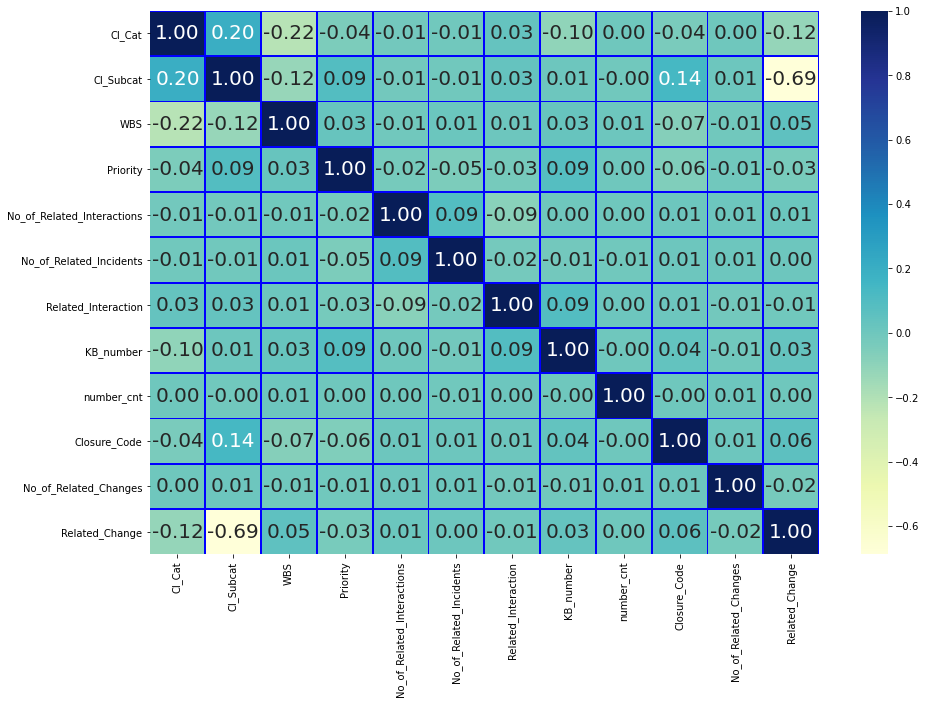

In [110]:
corrmatrix=n.corr()
plt.figure(figsize=(15,10))
sb.heatmap(corrmatrix,linewidths=0.8,linecolor='blue',cmap="YlGnBu",annot=True, fmt=".2f", annot_kws={"size":20})

In [111]:
corr_matrix = data.corr()
corr_matrix["Related_Change"].sort_values(ascending=False)

Related_Change                1.000000
Closure_Code                  0.061795
WBS                           0.051611
KB_number                     0.033510
No_of_Related_Interactions    0.010921
No_of_Related_Incidents       0.004893
number_cnt                    0.003444
Related_Interaction          -0.009006
No_of_Related_Changes        -0.024978
Priority                     -0.032341
No_of_Reassignments          -0.051822
Category                     -0.115578
CI_Cat                       -0.119574
CI_Subcat                    -0.688407
Name: Related_Change, dtype: float64

## Identify the independent and dependent variable

In [112]:
X = data.loc[:,['CI_Cat','CI_Subcat','WBS','Priority','No_of_Related_Interactions','No_of_Related_Incidents','Related_Interaction','KB_number','number_cnt','Closure_Code','No_of_Related_Changes']]
y = data.Related_Change

## Splitting the dataset to Train and Test

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modeling

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Decision Tree Algorithm

In [116]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train) 
y_pred1 = DT.predict(X_test) 

# Accuracy
acc_DT = accuracy_score(y_test,y_pred1)*100

print('accuracy of Decision Tree:', '%.2f'%acc_DT)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred1))
print("Classification_report :")
print(classification_report(y_test, y_pred1)) 

accuracy of Decision Tree: 98.61
Confusion_matrix :
[[4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]
Classification_report :
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           3       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       1.00      1.00      1.00        31
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         6
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          18       1.00      0.33      0.50         3
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00    

## Random Forest Algorithm

In [117]:
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train) 
y_pred2 = RF.predict(X_test)

# Accuracy
acc_RF = accuracy_score(y_test,y_pred2)*100

print('accuracy of Random Forest:', '%.2f'%acc_RF)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred2))
print("Classification_report :")
print(classification_report(y_test, y_pred2)) 

accuracy of Random Forest: 99.32
Confusion_matrix :
[[ 4  0  0 ...  0  0  0]
 [ 0 31  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification_report :
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           9       1.00      1.00      1.00        31
          11       0.00      0.00      0.00         1
          14       1.00      0.83      0.91         6
          16       0.00      0.00      0.00         1
          18       1.00      0.33      0.50         3
          20       0.00      0.00      0.00         0
          23       0.33      0.50      0.40         2
          25       0.00      0.00      0.00         1
          26       1.00      1.00      1.00         7
          32       0.00      0.00      0.00         1
          33       1.00      1.00      1.00         3
          38       0.00      0.00      0.00         1
          4

## Xgboost Algorithm

In [118]:
XGB = XGBClassifier(random_state=0,eval_metric='mlogloss')
XGB.fit(X_train, y_train)
y_pred3 = XGB.predict(X_test)

# Accuracy
acc_XGB = accuracy_score(y_test,y_pred3)*100

print('accuracy of xgboost:', '%.2f'%acc_XGB)
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred3))
print("Classification_report :")
print(classification_report(y_test, y_pred3))

accuracy of xgboost: 97.56
Confusion_matrix :
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification_report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        31
          11       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         1
          26       0.46      0.86      0.60         7
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         3
          38       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         3
          48       0.00      0.00      0.00         1

## Accuracy of model

In [119]:
acc=[acc_DT,acc_RF,acc_XGB]
algorithm=['Decision Tree','Random Forest','Xgboost']
for i in  range(len(acc)):
    print(algorithm[i],'has accuracy:','%.2f'%acc[i],'%')

Decision Tree has accuracy: 98.61 %
Random Forest has accuracy: 99.32 %
Xgboost has accuracy: 97.56 %


## Prediction

In [120]:
n

,CI_Cat,CI_Subcat,WBS,Priority,No_of_Related_Interactions,No_of_Related_Incidents,Related_Interaction,KB_number,number_cnt,Closure_Code,No_of_Related_Changes,Related_Change
0,11,57,137,4.0,1.0,2.0,2,413,0.601292,6,1.0,54
1,1,57,70,3.0,1.0,1.0,3,456,0.415050,10,1.0,54
2,1,10,74,3.0,1.0,1.0,4,244,0.517551,4,1.0,194
3,1,57,70,4.0,1.0,1.0,5,456,0.642927,5,1.0,54
4,1,57,70,4.0,1.0,1.0,6,456,0.345258,6,1.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...
46601,1,45,59,4.0,1.0,1.0,43057,1025,0.231896,6,1.0,54
46602,1,45,59,4.0,1.0,1.0,43052,1821,0.805153,12,1.0,54
46603,3,21,73,5.0,1.0,1.0,43053,225,0.917466,1,1.0,73
46604,1,57,59,4.0,1.0,1.0,43054,1003,0.701278,10,1.0,54


### Row 0

In [121]:
print(DT.predict(sc.transform([[11,57,137,4.0,1.0,2.0,2,413,0.601292,6,1.0]])))

[54]


In [122]:
print(RF.predict(sc.transform([[11,57,137,4.0,1.0,2.0,2,413,0.601292,6,1.0]])))

[54]


In [123]:
print(XGB.predict(sc.transform([[11,57,137,4.0,1.0,2.0,2,413,0.601292,6,1.0]])))

[54]


### Row 2

In [124]:
print(DT.predict(sc.transform([[1,10,74,3.0,1.0,1.0,4,244,0.517551,4,1.0]])))

[194]


In [125]:
print(RF.predict(sc.transform([[1,10,74,3.0,1.0,1.0,4,244,0.517551,4,1.0]])))

[194]


In [126]:
print(XGB.predict(sc.transform([[1,10,74,3.0,1.0,1.0,4,244,0.517551,4,1.0]])))

[194]


### Row 46603

In [127]:
print(DT.predict(sc.transform([[3,21,73,5.0,1.0,1.0,43053,225,0.917466,1,1.0]])))

[73]


In [128]:
print(RF.predict(sc.transform([[3,21,73,5.0,1.0,1.0,43053,225,0.917466,1,1.0]])))

[73]


In [129]:
print(XGB.predict(sc.transform([[3,21,73,5.0,1.0,1.0,43053,225,0.917466,1,1.0]])))

[73]
